In [17]:
import os
import sys
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
from matplotlib_venn import venn3

In [101]:
def GO_terms():
    var_holder = {} #Varibles for iteration
    filelist = [file for file in os.listdir(sys.path[0]) if file.endswith("1%.txt") ] #To only open .txt files
    for filename in filelist: #This part could be merged with the filelist to save one line, but for a correction in the order of files I did it separately
        TFile =  pd.read_csv(os.path.join(sys.path[0], filename),sep="\t",header=0, index_col = 0)
        for GO in TFile.index.values.tolist():
            var_holder[GO] = TFile.loc[GO,"description"]
            
    return var_holder
    

In [96]:
def plot_Venn_diagram(net,GOterms):
    var_holder = [] #Varibles for iteration
    filelist = [file for file in os.listdir(sys.path[0]) if file.startswith(net) and file.endswith("1%.txt") ] #To only open .txt files
    for filename in filelist: #This part could be merged with the filelist to save one line, but for a correction in the order of files I did it separately
        TFile =  pd.read_csv(os.path.join(sys.path[0], filename),sep="\t",header=0, index_col = 0)
        var_holder.append(TFile.index.values.tolist())

    if net == "net1" : Netname = "Reactome network"
    elif net == "net8" : Netname = "Dorothea network"
    else : Netname = "a network"
        
    name = f'{net}_allvsaggrvsnonaggr'
    set1 = set(var_holder[1]) #For the order of the labels
    set2 = set(var_holder[0])
    set3 = set(var_holder[2])
    v=venn3([set1, set2, set3], ('all', 'aggr', 'nonaggr'))
    plt.title(f'Venn diagram of the all, aggr and nonaggr Go terms in \n prostate cancers for {Netname} and 1% top genes',size=12)
    plt.savefig(f'GO_Comparison_{net}.png',bbox_inches="tight")
    plt.show()
    UAggr = set2 - set1.union(set3)
    UNAgg = set3 - set1.union(set2)
    Intersec = set1.intersection(set2,set3)
    print("\nUnique GO terms in aggressive",UAggr)
    for GO in UAggr:
        print(f"{GO} : {GOterms[GO]}")
    print("\nUnique GO terms in non aggressive",UNAgg)
    for GO in UNAgg:
        print(f"{GO} : {GOterms[GO]}")
    print("\nGo terms in common for aggressive and non aggresive",Intersec)
    for GO in Intersec:
        print(f"{GO} : {GOterms[GO]}")
    return [UAggr,UNAgg,Intersec]

In [102]:
GOterms = GO_terms()

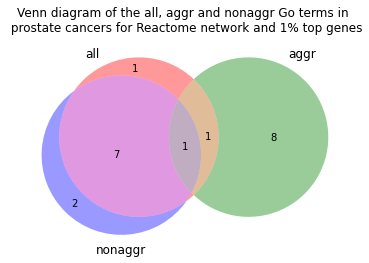


Unique GO terms in aggressive {'GO:0006352', 'GO:0043062', 'GO:0150076', 'GO:0060537', 'GO:0001503', 'GO:0048511', 'GO:0006289', 'GO:0098742'}
GO:0006352 : DNA-templated transcription, initiation
GO:0043062 : extracellular structure organization
GO:0150076 : neuroinflammatory response
GO:0060537 : muscle tissue development
GO:0001503 : ossification
GO:0048511 : rhythmic process
GO:0006289 : nucleotide-excision repair
GO:0098742 : cell-cell adhesion via plasma-membrane adhesion molecules

Unique GO terms in non aggressive {'GO:0099177', 'GO:0050890'}
GO:0099177 : regulation of trans-synaptic signaling
GO:0050890 : cognition

Go terms in common for aggressive and non aggresive {'GO:0002764'}
GO:0002764 : immune response-regulating signaling pathway


In [103]:
NET1 = plot_Venn_diagram("net1",GOterms)

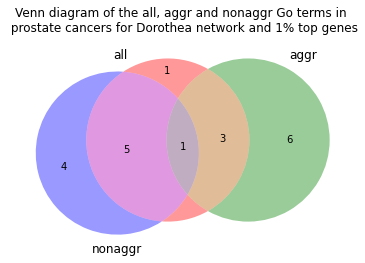


Unique GO terms in aggressive {'GO:0006352', 'GO:0150076', 'GO:0001503', 'GO:0007492', 'GO:0098742', 'GO:0009755'}
GO:0006352 : DNA-templated transcription, initiation
GO:0150076 : neuroinflammatory response
GO:0001503 : ossification
GO:0007492 : endoderm development
GO:0098742 : cell-cell adhesion via plasma-membrane adhesion molecules
GO:0009755 : hormone-mediated signaling pathway

Unique GO terms in non aggressive {'GO:1901652', 'GO:0001655', 'GO:0050769', 'GO:0045165'}
GO:1901652 : response to peptide
GO:0001655 : urogenital system development
GO:0050769 : positive regulation of neurogenesis
GO:0045165 : cell fate commitment

Go terms in common for aggressive and non aggresive {'GO:0048545'}
GO:0048545 : response to steroid hormone


In [104]:
NET8 = plot_Venn_diagram("net8",GOterms)

In [106]:
Aggr = NET1[0].intersection(NET8[0])
print("\nGO terms in common for aggressive",Aggr)
for GO in Aggr:
    print(f"{GO} : {GOterms[GO]}")

NAggr = NET1[1].intersection(NET8[1])
print("\nGO terms in common for non aggressive",NAggr)
for GO in NAggr:
    print(f"{GO} : {GOterms[GO]}")

All = NET1[2].intersection(NET8[2])
print("\nGO terms in common for the intersection",All)
for GO in All:
    print(f"{GO} : {GOterms[GO]}")


GO terms in common for aggressive {'GO:0006352', 'GO:0001503', 'GO:0150076', 'GO:0098742'}
GO:0006352 : DNA-templated transcription, initiation
GO:0001503 : ossification
GO:0150076 : neuroinflammatory response
GO:0098742 : cell-cell adhesion via plasma-membrane adhesion molecules

GO terms in common for non aggressive set()

GO terms in common for the intersection set()
